# Анализ датасета изображений

In [1]:
from os import walk
from PIL import Image
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')

In [2]:
TRAIN_PATH = 'train/'
TEST_PATH = 'test/'

## Тренировочный датасет

In [3]:
train_df = pd.read_csv("train.csv")
print(f"Общее кол-во изображений в train: {train_df.shape[0]}")

Общее кол-во изображений в train: 5162


#### Размеры изображений

In [4]:
sizes = {}
width = []
for (dirpath, dirnames, filenames) in walk(TRAIN_PATH):
    for file in filenames:
        if 'jpg' in file.lower():
            with Image.open(f"{dirpath}/{file}") as img:
                size = img.size
                width.append(size[0])
                if size in sizes:
                    sizes[size] += 1
                else:
                    sizes[size] = 1
train_df['img_width'] = width
sizes

{(1024, 576): 4968,
 (5472, 3078): 148,
 (1024, 683): 31,
 (1024, 768): 7,
 (5472, 3648): 6,
 (4000, 3000): 2}

Большая часть изображений с шириной 1024 пикселя

#### Количество отмеченных силуэтов на фото

<AxesSubplot: xlabel='count_region', ylabel='count'>

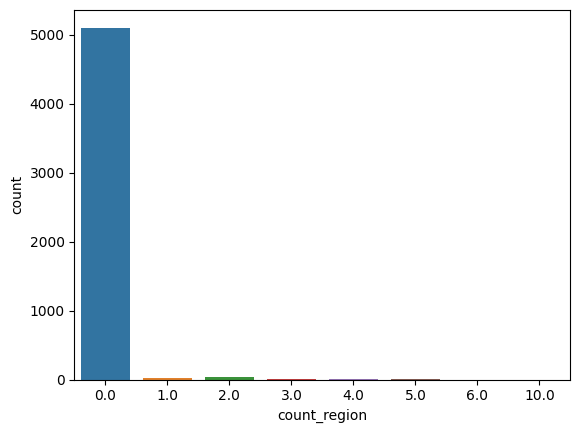

In [5]:
sns.countplot(x="count_region", data=train_df)

In [11]:
train_df.count_region.value_counts()

0.0     5104
2.0       31
1.0       16
4.0        3
5.0        3
3.0        3
6.0        1
10.0       1
Name: count_region, dtype: int64

Количество отмеченных силуэтов на фото в разрезе размера изображения

In [6]:
train_df.groupby(['count_region', 'img_width'])['ID_img'].agg('count')

count_region  img_width
0.0           1024         4952
              4000            2
              5472          150
1.0           1024           15
              5472            1
2.0           1024           29
              5472            2
3.0           1024            3
4.0           1024            3
5.0           1024            3
6.0           1024            1
10.0          5472            1
Name: ID_img, dtype: int64

#### Примеры изображений

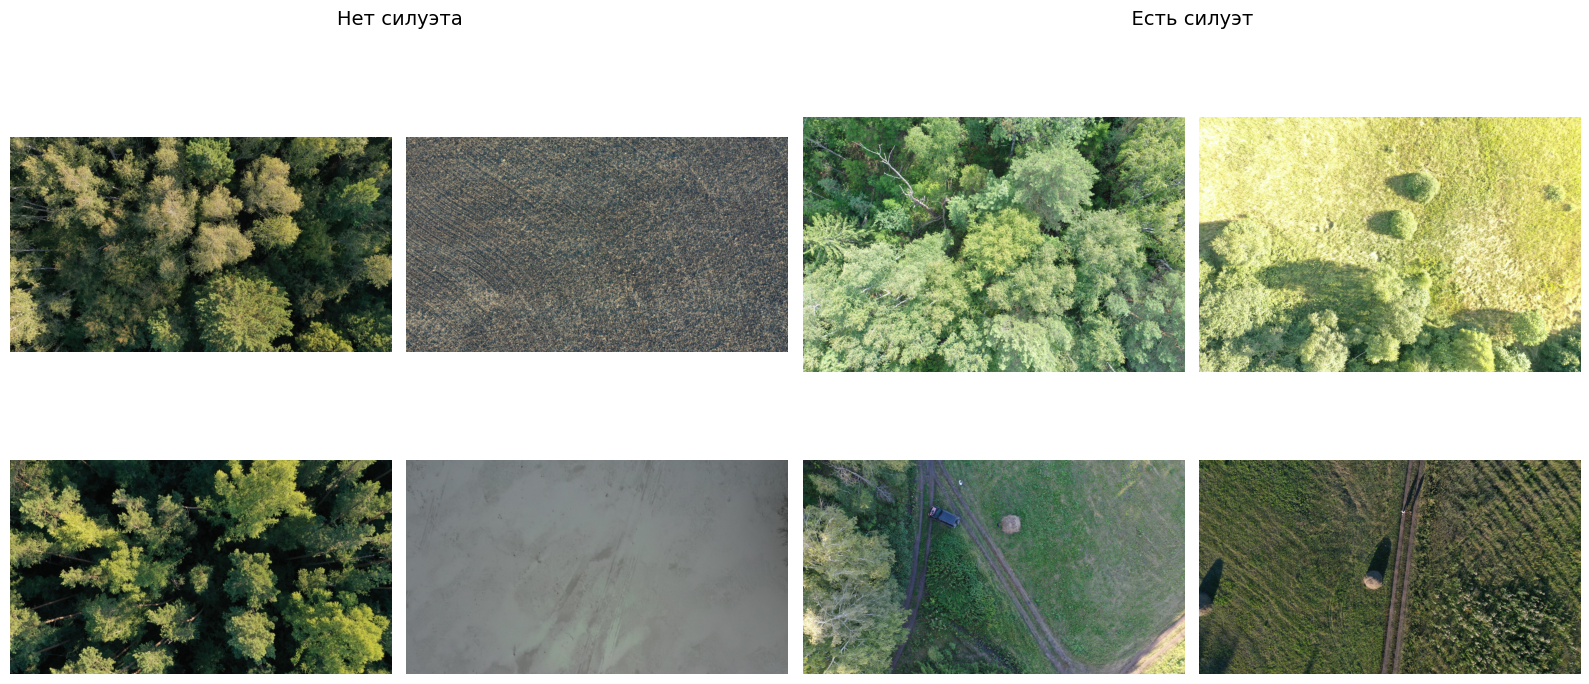

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle(f'Нет силуэта {" "*105} Есть силуэт', fontsize=14)

for i, name in zip(range(4), train_df[train_df['count_region'] == 0 ].sample(4, random_state=42)['ID_img']):
    axs[i // 2, (i % 2)].imshow(plt.imread(f"{TRAIN_PATH}{name}"))
    axs[i // 2, (i % 2)].axis('off')

for i, name in zip(range(4), train_df[train_df['count_region'] >=1 ].sample(4, random_state=42)['ID_img']):
    axs[i // 2, (i % 2)+2].imshow(plt.imread(f"{TRAIN_PATH}{name}"))
    axs[i // 2, (i % 2)+2].axis('off')

fig.tight_layout()
fig.subplots_adjust(top=0.95)

## Тестовый датасет

In [8]:
test_df = pd.read_csv("sample_solution.csv")
print(f"Общее кол-во изображений в test: {test_df.shape[0]}")

Общее кол-во изображений в test: 3435


#### Размеры изображений

In [9]:
sizes = {}
for (dirpath, dirnames, filenames) in walk(TEST_PATH):
    for file in filenames:
        if 'jpg' in file.lower():
            with Image.open(f"{dirpath}/{file}") as img:
                size = img.size
                if size in sizes:
                    sizes[size] += 1
                else:
                    sizes[size] = 1
sizes

{(1024, 576): 3300,
 (5472, 3078): 105,
 (1024, 683): 17,
 (5472, 3648): 5,
 (1024, 768): 5,
 (4000, 2250): 3}

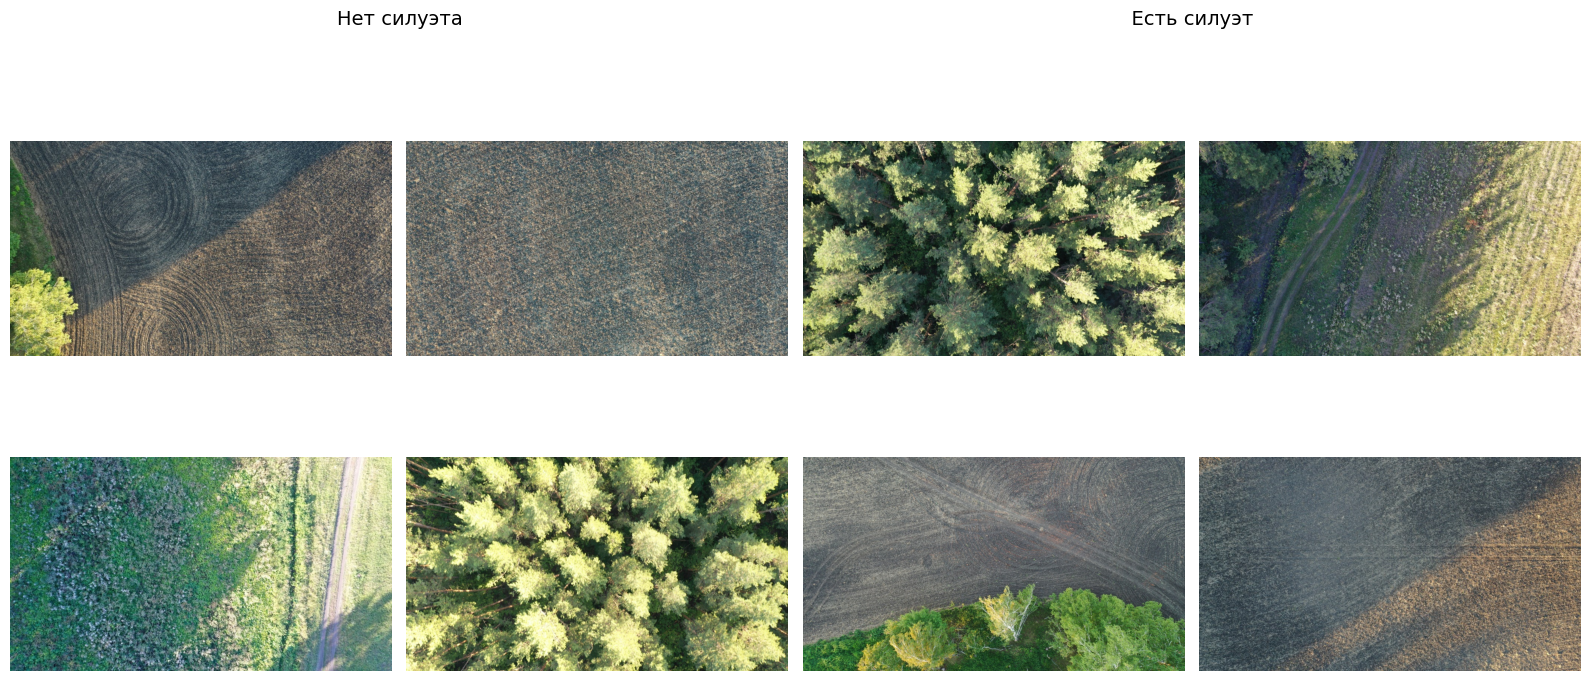

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle(f'Нет силуэта {" "*105} Есть силуэт', fontsize=14)

for i, name in zip(range(8), test_df.sample(8, random_state=42)['ID_img']):
    axs[i // 4, (i % 4)].imshow(plt.imread(f"{TEST_PATH}{name}"))
    axs[i // 4, (i % 4)].axis('off')

fig.tight_layout()
fig.subplots_adjust(top=0.95)